In [15]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt

In [16]:
os.getcwd()

'C:\\Users\\Dhananjay\\3D Objects\\PGDA Data Science\\imarticus PGDA\\Deep Learning\\ANN & DIgit Recognition\\Project'

In [17]:
# open the file read 0nly
h5f=h5py.File('SVHN_digit.h5','r')

### Splitting the dataset into Train & Test

In [18]:
Also normalize the data by dividing with 255.0(dividing by 255.0)

SyntaxError: invalid syntax (3872721092.py, line 1)

In [19]:
# Loading the Train and Test Data
X_train=h5f['X_train'][:]
y_train=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test=h5f['y_test'][:]

# closing this file
h5f.close()

In [20]:
print(X_train.shape,X_test.shape)

(42000, 32, 32) (18000, 32, 32)


In [21]:
type(X_train)

numpy.ndarray

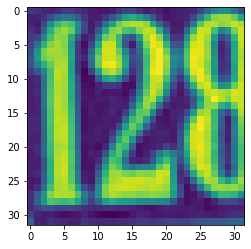

In [22]:
plt.imshow(X_train[0])

In [27]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


###  converting to 1d array to multi dimensional

In [28]:
X_train=X_train.reshape(X_train.shape[0],1024)
X_test=X_test.reshape(X_test.shape[0],1024)

# normalize inputs from 0-255 to 0-1
X_train=X_train/255.0
X_test=X_test/255.0


print('Training Dataset',X_train.shape,y_train.shape)
print('Test Dataset',X_test.shape,y_test.shape)

Training Dataset (42000, 1024) (42000,)
Test Dataset (18000, 1024) (18000,)


## Building the neural Network

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [38]:
model=Sequential()

In [44]:
model.add(Dense(128,kernel_initializer='uniform',activation='relu',input_dim=1024))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(32,kernel_initializer='uniform',activation='relu'))

In [42]:
# Find whats wrong
model.add(Dense(128, kernel_initializer='uniform',activation='relu',input_shape=(1024,))
model.add(Dense(64, kernel_initializer='uniform',activation='relu')) 
model.add(Dense(32, kernel_initializer='uniform',activation ='relu'))          

SyntaxError: invalid syntax (2784452099.py, line 2)

In [45]:
# Adding the output layer

model.add(Dense(10,activation='softmax'))

In [62]:
# compiling the model wit Adam optimizer
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

### Validation Split

In [63]:
# fitting the model

model.fit(X_train,y_train,epochs=50,validation_split=0.25)

Epoch 1/50
985/985 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.1012 - val_loss: 2.3030 - val_accuracy: 0.1010
Epoch 2/50
985/985 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1028 - val_loss: 2.3033 - val_accuracy: 0.0950
Epoch 3/50
985/985 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3032 - val_accuracy: 0.0950
Epoch 4/50
985/985 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1012 - val_loss: 2.3031 - val_accuracy: 0.0966
Epoch 5/50
985/985 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1025 - val_loss: 2.3029 - val_accuracy: 0.1010
Epoch 6/50
985/985 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3032 - val_accuracy: 0.0950
Epoch 7/50
985/985 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3031 - val_accuracy: 0.0950
Epoch 

In [64]:
# predicting the model
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

563/563 [==============================] - 1s 1ms/step


In [49]:
np.round(test_pred[:10],3)

array([[0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099],
       [0.099, 0.101, 0.1  , 0.102, 0.099, 0.103, 0.1  , 0.097, 0.1  ,
        0.099]], dtype=float32)

In [50]:
np.argmax(np.round(test_pred[:10],3),axis=1)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [51]:
np.mean(np.argmax(np.round(test_pred[:10],3),axis=1))

5.0

In [65]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error

In [67]:
test_pred=model.predict(X_test)
test_pred=np.round(test_pred)
cm=confusion_matrix(y_test,test_pred)
print(cm)

# classification_report
print(classification_report(y_test,test_pred))

563/563 [==============================] - 1s 1ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [52]:
y_test[:10]

array([1, 7, 2, 9, 0, 9, 1, 8, 4, 4], dtype=uint8)

#### changing target as categorical data

In [69]:
from keras.utils import to_categorical

In [70]:
num_of_classes=len(np.unique(y_train))
num_of_classes

10

In [71]:
y_train=to_categorical(y_train,num_of_classes)
y_test=to_categorical(y_train)

In [74]:
y_train[:1]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [75]:
# compiling the model wit Adam optimizer
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

In [76]:
# fitting the model

model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1313/1313 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.1002

ValueError: Data cardinality is ambiguous:
  x sizes: 18000
  y sizes: 42000
Make sure all arrays contain the same number of samples.